In [9]:
!pip install folium
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN             
import plotly as py
import folium as fol
import nltk as nlt
import altair as alt
import warnings
warnings.filterwarnings("ignore")

In [134]:
df.shape

(9551, 21)

In [132]:
df=pd.read_csv("Dataset .csv")
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [45]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [138]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [140]:
df.columns.tolist() #getting list all columns 

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [142]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [144]:
df.duplicated().sum()

0

# LEVEL 1 
# TASK 1
## Top Cuisine

In [146]:
# Split the 'Cuisines' string by comma and space, and expand the list into new rows
all_cuisines = df['Cuisines'].str.split(', ').explode()

# Count the frequency of each individual cuisine and get the top 3
top_three_cuisines = all_cuisines.value_counts().nlargest(3)

# Print the result
print("Top three most common cuisines:")
print(top_three_cuisines)

Top three most common cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [88]:

# Define the list of the top three cuisines
top_cuisines = ['North Indian', 'Chinese', 'Fast Food']

# Get the total number of restaurants for the denominator
total_restaurants = len(df)

# 1. Use a dictionary comprehension to quickly calculate the count for each cuisine
# str.contains() counts restaurants where the cuisine name appears in the Cuisines string
cuisine_counts = {
    cuisine: df['Cuisines'].str.contains(cuisine, case=False, na=False).sum()
    for cuisine in top_cuisines
}

# 2. Convert the counts dictionary to a Pandas Series and calculate the percentage
percentage_series = (pd.Series(cuisine_counts) / total_restaurants) * 100

print("Percentage of restaurants serving the top cuisines:")
print(percentage_series.to_string(float_format="%.2f"))

Percentage of restaurants serving the top cuisines:
North Indian   41.46
Chinese        28.61
Fast Food      20.80


# TASK 2
## City Analysis

In [92]:
# Count the occurrences of each city
city_counts = df['City'].value_counts()

# Get the city with the largest count
top_city = city_counts.nlargest(1)

print("The city with the highest number of restaurants is:")
print(top_city)

The city with the highest number of restaurants is:
City
New Delhi    5473
Name: count, dtype: int64


In [94]:
# Group the data by 'City' and calculate the mean of 'Aggregate rating'
average_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

print("Average restaurant rating for each city:")
print(average_ratings)

Average restaurant rating for each city:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [96]:
# Group the data by 'City' and calculate the mean of 'Aggregate rating'
average_ratings = df.groupby('City')['Aggregate rating'].mean()

# Find the city with the highest average rating using idxmax()
city_with_highest_avg_rating = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()

print(f"City: {city_with_highest_avg_rating}")
print(f"Average Rating: {highest_avg_rating:.2f}")

City: Inner City
Average Rating: 4.90


# TASK 3
## Price Range Distribution

<Axes: title={'center': 'Distribution of Price Ranges'}, xlabel='Price Range (1: Cheapest to 4: Most Expensive)', ylabel='Number of Restaurants'>

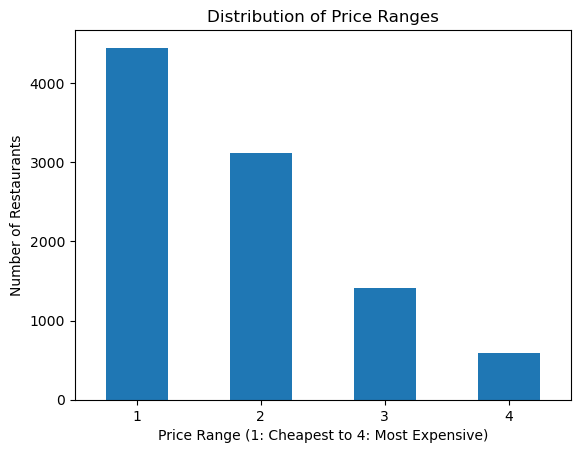

In [150]:
# CRITICAL FIX: Ensure the column is string type for plotting reliability
df['Price range'] = df['Price range'].astype(str)

# Calculate the counts, sort by range (1, 2, 3, 4), and plot the bar chart
df['Price range'].value_counts().sort_index().plot(
    kind='bar',
    title='Distribution of Price Ranges',
    xlabel='Price Range (1: Cheapest to 4: Most Expensive)',
    ylabel='Number of Restaurants',
    rot=0  # Keeps the X-labels horizontal
)

In [102]:
# CRITICAL FIX: Ensure the column is string type for reliable calculation
df['Price range'] = df['Price range'].astype(str)

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage for each price range category
price_range_percentages = (df['Price range'].value_counts() / total_restaurants) * 100

# Sort and display the results by price range (1, 2, 3, 4)
price_range_percentages = price_range_percentages.sort_index()

print("Percentage of restaurants in each price range category:")
print(price_range_percentages.to_string(float_format="%.2f"))

Percentage of restaurants in each price range category:
Price range
1   46.53
2   32.59
3   14.74
4    6.14


# TASK 4
##  Online Delivery

In [105]:
# Count the number of restaurants that offer online delivery ('Yes')
online_delivery_count = (df['Has Online delivery'] == 'Yes').sum()

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100

print(f"Percentage of restaurants that offer online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


In [153]:
# Group the data by 'Has Online delivery' and calculate the mean of 'Aggregate rating'
average_ratings_by_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()

print("Average ratings of restaurants with and without online delivery:")
print(average_ratings_by_delivery.to_string(float_format="%.2f"))

Average ratings of restaurants with and without online delivery:
Has Online delivery
No    2.47
Yes   3.25


# LEVEL 2
# TASK 1 
## Restaurant Ratings

In [155]:
# Filter out the 0.0 rating to analyze actual customer sentiment
sentiment_ratings = df[df['Aggregate rating'] > 0]

# Define the bins and labels for the rating ranges
bins = [0, 1.5, 2.5, 3.5, 4.5, 5.0]
labels = ['1.0-1.4 (Poor)', '1.5-2.4 (Average)', '2.5-3.4 (Good)', '3.5-4.4 (Very Good)', '4.5-4.9 (Excellent)']

# Segment the ratings into bins and count the occurrences in each range
rating_ranges = pd.cut(sentiment_ratings['Aggregate rating'], bins=bins, labels=labels, right=False)
range_distribution = rating_ranges.value_counts()

# Get the most common range
most_common_range = range_distribution.nlargest(1)

print("Distribution of Ratings Grouped into Ranges:")
print(range_distribution.to_string())

print("\nMost Common Rating Range:")
print(most_common_range.to_string())

Distribution of Ratings Grouped into Ranges:
Aggregate rating
2.5-3.4 (Good)         3737
3.5-4.4 (Very Good)    3179
4.5-4.9 (Excellent)     301
1.5-2.4 (Average)       186
1.0-1.4 (Poor)            0

Most Common Rating Range:
Aggregate rating
2.5-3.4 (Good)    3737


In [112]:
# Calculate the average number of votes received by all restaurants
average_votes = df['Votes'].mean()

print(f"The average number of votes received by restaurants is: {average_votes:.2f}")

The average number of votes received by restaurants is: 156.91


# TASK 2
## Cuisine Combination

In [119]:
# Count the frequency of each unique string in the 'Cuisines' column
cuisine_combination_counts = df['Cuisines'].value_counts()

# Determine the top 10 most common combinations
most_common_combinations = cuisine_combination_counts.nlargest(10)

print("Top 10 Most Common Combinations of Cuisines:")
print(most_common_combinations)

Top 10 Most Common Combinations of Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [182]:
# 1. Identify the top 10 most common cuisine combinations
top_10_combinations = df['Cuisines'].value_counts().nlargest(10).index.tolist()

# 2. Filter the DataFrame to include only the restaurants with these top 10 combinations
df_filtered = df[df['Cuisines'].isin(top_10_combinations)]

# 3. Group by Cuisines combination and calculate the average rating, then sort
average_ratings_by_combination = df_filtered.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

print("Average rating for the top 10 most common cuisine combinations:")
print(average_ratings_by_combination.to_string(float_format="%.2f"))

Average rating for the top 10 most common cuisine combinations:
Cuisines
Cafe                             2.89
North Indian, Mughlai            2.89
North Indian, Mughlai, Chinese   2.57
North Indian, Chinese            2.42
Bakery, Desserts                 2.32
Street Food                      2.16
Fast Food                        2.12
Chinese                          2.04
Bakery                           1.92
North Indian                     1.67


# TASK 3
##  Geographic Analysis

In [188]:
import altair as alt
alt.data_transformers.disable_max_rows()

chart = alt.Chart(df_clean).mark_circle(size=60).encode(
    x='Longitude:Q',
    y='Latitude:Q',
    tooltip=['Restaurant Name:N', 'City:N', 'Aggregate rating:Q'],
    color=alt.Color('Aggregate rating:Q', scale=alt.Scale(scheme='viridis'), title='Rating')
).properties(
    title='Geographic Distribution of Restaurants'
).interactive()

chart


alt.Chart(...)

In [194]:
# Import necessary libraries (assuming your environment has them)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Prepare data (Filter for valid coordinates and geographical bounds, e.g., India)
df_geo = df.dropna(subset=['Latitude', 'Longitude']).copy()
df_geo = df_geo[(df_geo['Latitude'] != 0) & (df_geo['Longitude'] != 0)]
df_india = df_geo[
    (df_geo['Latitude'].between(5, 37)) &
    (df_geo['Longitude'].between(68, 98))
].copy()

# 2. Scale the coordinates (CRITICAL for distance-based clustering)
coords = df_india[['Latitude', 'Longitude']].values
coords_scaled = StandardScaler().fit_transform(coords)

# 3. Apply DBSCAN clustering
# eps=0.15 (Max distance between samples for one to be considered as in the neighborhood of the other)
# min_samples=30 (Number of samples in a neighborhood for a point to be considered as a core point)
db = DBSCAN(eps=0.15, min_samples=30)
df_india['Cluster'] = db.fit_predict(coords_scaled)

# 4. Analyze Cluster Results
n_clusters = len(set(df_india['Cluster'])) - (1 if -1 in df_india['Cluster'] else 0)
print(f" Number of clusters (dense areas) found: {n_clusters}")

# Summary of the largest clusters (highest concentration of restaurants)
cluster_sizes = df_india['Cluster'].value_counts()

print("\n Top 5 Clusters (Restaurant Hubs) by Size:")
# Cluster -1 represents 'Noise' or isolated restaurants
print(cluster_sizes[cluster_sizes.index != -1].nlargest(5).to_string())

 Number of clusters (dense areas) found: 2

 Top 5 Clusters (Restaurant Hubs) by Size:
Cluster
0    7549


# TASK 4
## Restaurant Chains

In [201]:
# Count the frequency of each unique restaurant name
restaurant_counts = df['Restaurant Name'].value_counts()

# Filter for names that appear more than once (the chains)
chains = restaurant_counts[restaurant_counts > 1]

# Display the top 10 largest chains
top_10_chains = chains.nlargest(10)

print("--- Top 10 Largest Restaurant Chains (by number of locations) ---")
print(top_10_chains.to_string())

--- Top 10 Largest Restaurant Chains (by number of locations) ---
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26


In [203]:
# 1. Count the occurrences of each restaurant name
restaurant_counts = df['Restaurant Name'].value_counts()

# 2. Identify chains (more than 1 location) and get the top 10 names
top_10_chain_names = restaurant_counts[restaurant_counts > 1].nlargest(10).index.tolist()

# 3. Filter data for the top chains and calculate metrics
chain_analysis = df[df['Restaurant Name'].isin(top_10_chain_names)].groupby('Restaurant Name').agg(
    Locations=('Restaurant Name', 'size'),
    Average_Rating=('Aggregate rating', 'mean')
).sort_values(by='Locations', ascending=False)

print("Analysis of Top 10 Largest Restaurant Chains:")
print(chain_analysis.to_string(float_format="%.2f"))

Analysis of Top 10 Largest Restaurant Chains:
                  Locations  Average_Rating
Restaurant Name                            
Cafe Coffee Day          83            2.42
Domino's Pizza           79            2.74
Subway                   63            2.91
Green Chick Chop         51            2.67
McDonald's               48            3.34
Keventers                34            2.87
Pizza Hut                30            3.32
Giani                    29            2.69
Baskin Robbins           28            1.86
Barbeque Nation          26            4.35


# LEVEL 3
# TASK 1
## Restaurant Reviews

In [208]:
# Define the categories
positive_ratings = ['Excellent', 'Very Good', 'Good']
negative_ratings = ['Average', 'Poor', 'Not rated']

# Get the counts for all rating texts
rating_counts = df['Rating text'].value_counts()

# Separate and display positive and negative counts
positive_counts = rating_counts[rating_counts.index.isin(positive_ratings)].sort_values(ascending=False)
negative_counts = rating_counts[rating_counts.index.isin(negative_ratings)].sort_values(ascending=False)

print("--- Most Common Positive Keywords (Rating Text Counts) ---")
print(positive_counts.to_string())

print("\n--- Most Common Negative Keywords (Rating Text Counts) ---")
print(negative_counts.to_string())

--- Most Common Positive Keywords (Rating Text Counts) ---
Rating text
Good         2100
Very Good    1079
Excellent     301

--- Most Common Negative Keywords (Rating Text Counts) ---
Rating text
Average      3737
Not rated    2148
Poor          186


In [210]:
# CRITICAL NOTE: This dataset does NOT contain the full text reviews, only the short 'Rating text' label (e.g., 'Excellent').

# 1. Calculate the average length of the available 'Rating text' label
df['Rating Length'] = df['Rating text'].str.len()
average_rating_text_length = df['Rating Length'].mean()

# 2. Analyze the relationship between the categorical 'Rating text' and 'Votes' (proxy for engagement)
average_votes_by_rating_text = df.groupby('Rating text')['Votes'].mean().sort_values(ascending=False)

print(f"Average length of the 'Rating text' label: {average_rating_text_length:.2f} characters.")
print("\nAverage Votes (Engagement) by Rating Category:")
print(average_votes_by_rating_text.to_string(float_format="%.2f"))

Average length of the 'Rating text' label: 7.02 characters.

Average Votes (Engagement) by Rating Category:
Rating text
Excellent   851.77
Very Good   520.46
Good        229.35
Poor         90.72
Average      48.25
Not rated     0.87


# TASK 2 
## Votes Analysis

In [215]:
# Identify the restaurant with the highest number of votes
highest_votes_restaurant = df.loc[df['Votes'].idxmax(), ['Restaurant Name', 'Votes']]

# Identify the restaurants with the lowest number of votes (all restaurants with 0 votes)
lowest_votes_restaurants = df[df['Votes'] == df['Votes'].min()][['Restaurant Name', 'Votes']]

# Display the highest and a sample of the lowest
print("Restaurant with the Highest Number of Votes:")
print(highest_votes_restaurant)

print("\nSample of Restaurants with the Lowest Number of Votes (0 Votes):")
print(lowest_votes_restaurants.head(5))

Restaurant with the Highest Number of Votes:
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Sample of Restaurants with the Lowest Number of Votes (0 Votes):
        Restaurant Name  Votes
69     Cantinho da Gula      0
874       The Chaiwalas      0
879  Fusion Food Corner      0
880       Punjabi Rasoi      0
887       Baskin Robbin      0


In [217]:
# Filter out unrated restaurants (Aggregate rating = 0.0)
df_rated = df[df['Aggregate rating'] > 0]

# Calculate the Pearson correlation coefficient
correlation = df_rated['Votes'].corr(df_rated['Aggregate rating'])

print(f"Correlation (r): {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(9, 6))
plt.scatter(df_rated['Votes'], df_rated['Aggregate rating'], alpha=0.4, color='darkblue')
plt.title('Relationship between Number of Votes and Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.savefig("votes_rating_correlation_scatter.png")
plt.close()

Correlation (r): 0.41


# TASK 3
## Price Range vs. Online Delivery and Table Booking

In [224]:
# Group by 'Price range' and calculate the percentage of 'Yes' for Online Delivery
online_delivery_percentage = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).mul(100).unstack()['Yes'].fillna(0).sort_index()

# Group by 'Price range' and calculate the percentage of 'Yes' for Table Booking
table_booking_percentage = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).mul(100).unstack()['Yes'].fillna(0).sort_index()

# Combine and print the results
combined_analysis = pd.DataFrame({
    'Online Delivery (%)': online_delivery_percentage,
    'Table Booking (%)': table_booking_percentage
})

print("Relationship between Price Range and Service Availability:")
print(combined_analysis.to_string(float_format="%.2f"))

Relationship between Price Range and Service Availability:
             Online Delivery (%)  Table Booking (%)
Price range                                        
1                          15.77               0.02
2                          41.31               7.68
3                          29.19              45.74
4                           9.04              46.76


In [226]:
# Group by 'Price range' and calculate the percentage of 'Yes' for Online Delivery
online_delivery_percentage = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).mul(100).unstack()['Yes'].fillna(0).sort_index()

# Group by 'Price range' and calculate the percentage of 'Yes' for Table Booking
table_booking_percentage = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).mul(100).unstack()['Yes'].fillna(0).sort_index()

# Combine and print the results
combined_analysis = pd.DataFrame({
    'Online Delivery (%)': online_delivery_percentage,
    'Table Booking (%)': table_booking_percentage
})

print("Relationship between Price Range and Service Availability:")
print(combined_analysis.to_string(float_format="%.2f"))

Relationship between Price Range and Service Availability:
             Online Delivery (%)  Table Booking (%)
Price range                                        
1                          15.77               0.02
2                          41.31               7.68
3                          29.19              45.74
4                           9.04              46.76
